In [62]:

import pandas as pd
df = pd.read_csv('/content/signal-data.csv')
print("five point summary")
print(df.describe)


five point summary
<bound method NDFrame.describe of                      Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6 

##Observations

 1. There exists an imbalance in the target variable. The dataset contains information about 1567 production entities, but the number of entities labeled as "Pass" (-1) and "Fail" (1) is not evenly distributed. Imbalanced datasets can affect the performance of machine learning models, particularly when training for classification tasks.

 2. Looking at the 5-point summary, there seems to be a wide range of values for some features, as indicated by the difference between the minimum and maximum values. For instance, feature "589" has a minimum value of 43.5231 and a maximum value of 208.2045. This suggests that some features exhibit significant variability, which could impact model training and performance. Feature scaling or normalization may be necessary to ensure that all features contribute equally to the model and prevent the dominance of certain variables during the training process.


3. The provided dataset contains missing values in some columns. For example, in the 5-point summary, the column labeled as "585" has NaN values. Missing data can impact the analysis and interpretation of the dataset.

In [63]:
import numpy as np
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column {col}: {unique_values}")

Streaming output truncated to the last 5000 lines.
  39.6961  60.7268  46.2809  53.5579  42.5772  41.7363  51.5643  43.5471
  21.7413  45.0114  21.3552  22.6578  37.3592  48.052   24.8291  29.4063
  38.157   38.5673  47.4773  69.6634  36.7117  45.09    33.7681  41.2546
  61.8424  57.9123  40.3976  36.5049  33.3972  36.0413  34.2864  46.0977
  42.3051  49.3689  35.8283  26.4673  25.0316  30.7043  51.0207  39.4513
  40.0775  41.037   30.8008  24.0877  30.6243  40.8596  33.9439  30.0595
  53.2417  58.1857  35.6511  46.2527  56.4421  25.572   38.6548  40.3198
  34.5364  43.0546  67.2759  47.567   52.8659  30.4937  61.5008  29.2231
  29.4493  17.2157  28.6131  30.6092  62.5957  28.299   47.4751  47.3188
  31.2577  53.6952  34.6468  44.5011  48.2774  26.8738  56.5936  55.212
  43.0639  60.4782  63.3906  49.8783  40.8233  55.3829  17.8321  61.3517
  49.0939  31.6821  36.0649  42.2732  21.0722  23.8959  34.8173  58.8417
  41.3996  46.6112  35.0709  46.5161  45.7552  26.6862  69.7034  30.5635
 

We see no special characters are used to represent null hence we can directly check for columns with more than 20% null values


In [64]:
# prompt: get datatype of all coumns

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [65]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Time'], dtype='object')

In [66]:

time_column = 'Time'
df[time_column] = pd.to_datetime(df[time_column], errors='coerce')
null_percentage = df[col].isnull().mean()
if null_percentage > 0.2:
  df = df.drop(col, axis=1)
else:
  df[col] = df[col].fillna(df[col].mean())


In [67]:

threshold = 0.2
non_timestamp_columns = [col for col in df.columns if col not in object_columns ]
df_non_timestamp = df[non_timestamp_columns].loc[:, df[non_timestamp_columns].isnull().mean() < threshold]

# Impute remaining null values with mean of the respective feature (excluding timestamp columns)
df_non_timestamp = df_non_timestamp.apply(lambda col: col.fillna(col.mean()), axis=0)

df_cleaned = pd.concat([df_non_timestamp, df['Time']], axis=1)


In [68]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 560 entries, 0 to Time
dtypes: datetime64[ns](1), float64(558), int64(1)
memory usage: 6.7 MB


In [69]:
constant_columns = df.columns[df.nunique() == 1]
df = df.drop(columns=constant_columns)
print(df)

                    Time        0        1          2          3       4  \
0    2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1    2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2    2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3    2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4    2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                  ...      ...      ...        ...        ...     ...   
1562 2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563 2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564 2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565 2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566 2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

             6       7       8       9  ...       581     582     583     584  \
0     

In [70]:
df_cleaned.describe()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


Performing variance thresholding  to find irrelevant features

In [71]:
from sklearn.feature_selection import VarianceThreshold
numeric_columns = df_cleaned.select_dtypes(exclude=['datetime64']).columns
df_numeric = df_cleaned[numeric_columns]
variance_threshold = 0.1
selector = VarianceThreshold(threshold=variance_threshold)
df_numeric_selected = selector.fit_transform(df_numeric)
df_numeric_selected = pd.DataFrame(df_numeric_selected, columns=df_numeric.columns[selector.get_support()])
df_processed = pd.concat([df_numeric_selected, df_cleaned['Time']], axis=1)
print(df_processed)

            0        1          2          3       4         6          12  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.439600   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.547000   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.017900   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.848200   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.942400   
...       ...      ...        ...        ...     ...       ...         ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  203.986700   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  204.017300   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  199.956809   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  197.244800   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  199.956809   

             14          15         16  ...        569       57

Removing variables with high mutual correlation

In [72]:
correlation_matrix = df.corr()
correlation_matrix
correlation_threshold = 0.85
high_correlation_pairs = np.where(np.abs(correlation_matrix) > correlation_threshold)

variable_pairs = []

for i in range(len(high_correlation_pairs[0])):
    variable1 = df.columns[high_correlation_pairs[0][i]]
    variable2 = df.columns[high_correlation_pairs[1][i]]

    if variable1 != variable2 and (variable2, variable1) not in variable_pairs:
        variable_pairs.append((variable1, variable2))

print("Variable pairs with high mutual correlation:")
for pair in variable_pairs:
    print(pair)
variables_to_remove = set()
for pair in variable_pairs:
  variables_to_remove.add(pair[1])
df_processed_final = df_processed.drop(columns=variables_to_remove, errors='ignore')

print(df_processed_final)

<ipython-input-72-de8611eea282>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Variable pairs with high mutual correlation:
('3', '6')
('3', '139')
('3', '274')
('3', '412')
('6', '139')
('6', '274')
('15', '146')
('15', '147')
('15', '151')
('15', '153')
('15', '281')
('15', '282')
('15', '286')
('15', '288')
('15', '419')
('15', '420')
('15', '424')
('15', '426')
('24', '26')
('28', '29')
('33', '35')
('41', '59')
('45', '48')
('51', '53')
('65', '68')
('66', '195')
('66', '196')
('66', '203')
('66', '204')
('66', '206')
('66', '331')
('66', '332')
('66', '335')
('66', '339')
('66', '340')
('66', '342')
('66', '468')
('66', '476')
('66', '478')
('73', '205')
('73', '208')
('73', '337')
('73', '341')
('73', '346')
('73', '477')
('84', '156')
('84', '157')
('84', '541')
('91', '104')
('92', '105')
('93', '95')
('95', '96')
('96', '100')
('98', '103')
('108', '239')
('108', '244')
('108', '245')
('108', '377')
('108', '382')
('108', '383')
('108', '511')
('108', '516')
('108', '517')
('113', '248')
('113', '386')
('116', '251')
('116', '389')
('116', '523')
('120'

In [73]:
print(df_processed_final)

            0        1          2          3       4          12         14  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  202.439600   7.955800   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  200.547000  10.154800   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  202.017900   9.515700   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  201.848200   9.605200   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  201.942400  10.566100   
...       ...      ...        ...        ...     ...         ...        ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843  203.986700  11.769200   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  204.017300   9.162000   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  199.956809   9.005371   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  197.244800   9.735400   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978  199.956809   9.005371   

              15         16          18  ...      5

In order to remove insignificant or mot so important features we have employed 2 methods:

1. Variance Thresholding:

Justification: Features with low variance contribute little information as they don't vary much across observations.

2. Correlation Analysis:

Justification: Highly correlated features may provide redundant information.

To further check and mitigate the multi-collinearity we will be using PCA or principal component analysis.

In [74]:
target=df_processed_final['Pass/Fail']
print(df_processed_final.columns)
df_processed_final=df_processed_final.drop(columns='Pass/Fail')
from sklearn.decomposition import PCA


numeric_columns = df_processed_final.select_dtypes(include='number')

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(numeric_columns)

# Display the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print(pca.feature_names_in_)
print(len(pca.feature_names_in_))

Index(['0', '1', '2', '3', '4', '12', '14', '15', '16', '18',
       ...
       '561', '562', '564', '569', '570', '572', '577', '589', 'Pass/Fail',
       'Time'],
      dtype='object', length=132)
Explained Variance Ratio:
[5.78878017e-01 2.39990732e-01 1.10446113e-01 2.67650641e-02
 1.51568670e-02 3.49983776e-03 3.45227221e-03 2.78518877e-03
 2.52889182e-03 2.38617674e-03 2.03984060e-03 1.44049506e-03
 1.38586102e-03 1.26693054e-03 1.11696328e-03 1.09627472e-03
 1.01414486e-03 8.80500067e-04 8.27517379e-04 6.14609216e-04
 5.83605842e-04 4.76615365e-04 3.54365660e-04 1.51169413e-04
 1.15479632e-04 9.98976991e-05 9.55890136e-05 6.95166699e-05
 5.57062989e-05 5.35474409e-05 5.10105558e-05 4.26085618e-05
 4.21853938e-05 3.55692736e-05 2.33948890e-05 2.07547735e-05
 1.73698099e-05 1.57725816e-05 1.37027033e-05 1.28236987e-05
 1.21173168e-05 1.06519240e-05 1.01195453e-05 8.99462920e-06
 7.87428794e-06 7.04618266e-06 4.82500044e-06 4.65477228e-06
 3.81628745e-06 3.72222630e-06 3.32606042e-

Another methodology is to calculate Tolerance, we will employ that too so we can compare the results.


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multicollinearity(data_frame, threshold_vif=10, threshold_tolerance=0.1):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    vif_data["Tolerance"] = 1 / vif_data["VIF"]

    problematic_variables = vif_data[(vif_data["VIF"] > threshold_vif) | (vif_data["Tolerance"] < threshold_tolerance)]

    return vif_data, problematic_variables

numeric_columns = df_processed_final.select_dtypes(include='number')

vif_results, problematic_vars = check_multicollinearity(numeric_columns)

print("VIF Results:")
print(vif_results)

print("\nProblematic Variables:")
print(problematic_vars)

print(vif_results.columns)

VIF Results:
    Variable           VIF  Tolerance
0          0   1985.157696   0.000504
1          1   1116.628299   0.000896
2          2  70858.831740   0.000014
3          3     16.150773   0.061917
4          4  26120.724931   0.000038
..       ...           ...        ...
125      569      7.585528   0.131830
126      570   1065.993658   0.000938
127      572      4.915657   0.203432
128      577     12.474244   0.080165
129      589      2.472842   0.404393

[130 rows x 3 columns]

Problematic Variables:
    Variable           VIF  Tolerance
0          0   1985.157696   0.000504
1          1   1116.628299   0.000896
2          2  70858.831740   0.000014
3          3     16.150773   0.061917
4          4  26120.724931   0.000038
..       ...           ...        ...
120      550     36.201463   0.027623
123      562   1635.495416   0.000611
124      564     10.180751   0.098225
126      570   1065.993658   0.000938
128      577     12.474244   0.080165

[97 rows x 3 columns]
Inde

As we can see we have got similar results with both algorithms.
So we will be using these 131 columns.

In [76]:
columns_pca = [f'PC{i+1}' for i in range(130)]
df_pca = pd.DataFrame(data=principal_components, columns=columns_pca)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130
0,-4665.453108,-2749.790482,671.061982,-8.280271,354.263513,36.826165,-83.242543,623.660667,-251.611676,707.664184,...,-0.026028,0.574791,-0.069167,-0.043718,-0.033049,0.010801,-0.001261,-0.011744,0.005363,-4.012449e-06
1,-1628.689108,-3644.941734,-1512.367534,-321.294035,-540.339600,-80.937488,447.218297,144.139382,-528.102419,868.761600,...,-0.291799,0.001787,0.015970,0.001353,-0.030947,0.011970,0.012226,-0.003777,0.001469,-5.460389e-06
2,-2758.137513,-3131.392326,-1865.184345,116.336831,-133.377929,-108.369466,42.918883,298.877688,437.070882,-186.022606,...,0.029805,0.061020,-0.010236,0.010337,-0.041019,0.029593,0.000547,0.008318,-0.003735,-1.174099e-05
3,-1721.590730,-539.596467,-1512.580291,605.849266,209.133625,43.589287,64.584849,-84.310434,-371.907082,-306.067307,...,-0.120121,0.122407,-0.077066,-0.064392,0.027073,-0.016018,0.008034,-0.002100,0.003310,-8.731096e-06
4,-3501.581672,-2130.000362,123.314809,147.934276,-126.189453,-73.625945,337.769360,106.702328,-292.237079,180.158058,...,-0.121765,-0.069732,0.209616,0.117084,-0.036373,0.012388,0.020800,-0.050395,0.023685,3.263634e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-4068.739103,3164.610859,320.448978,2249.599502,1284.687510,-571.209739,695.222714,-626.755235,1444.487909,288.670461,...,-0.111983,-0.080189,0.002193,-0.065752,-0.012938,0.023578,0.002206,-0.003456,0.005334,-3.993261e-06
1563,-4688.260855,-3471.846016,280.243921,-4.640733,-757.728286,-3.165014,-163.775402,-658.081802,-74.599844,-512.108384,...,-0.136685,0.085289,-0.232364,0.001207,-0.063510,0.037463,0.003448,0.004197,0.006416,5.278470e-05
1564,-3375.870605,-203.495878,-1204.828037,85.573624,476.378974,-36.381454,259.593775,145.564693,-282.406262,-206.067502,...,-0.035872,-0.002048,0.108844,0.002081,-0.019444,-0.009064,-0.011080,-0.010162,0.007222,-5.902778e-06
1565,-3817.014109,-1155.006458,372.514286,-170.336537,774.158451,-77.856034,277.416001,-409.953763,-349.168127,-69.001286,...,0.052726,-0.003083,-0.088501,0.017758,-0.027302,0.012209,0.017872,-0.007358,-0.007201,-6.744914e-06


In [77]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[5.78878017e-01 2.39990732e-01 1.10446113e-01 2.67650641e-02
 1.51568670e-02 3.49983776e-03 3.45227221e-03 2.78518877e-03
 2.52889182e-03 2.38617674e-03 2.03984060e-03 1.44049506e-03
 1.38586102e-03 1.26693054e-03 1.11696328e-03 1.09627472e-03
 1.01414486e-03 8.80500067e-04 8.27517379e-04 6.14609216e-04
 5.83605842e-04 4.76615365e-04 3.54365660e-04 1.51169413e-04
 1.15479632e-04 9.98976991e-05 9.55890136e-05 6.95166699e-05
 5.57062989e-05 5.35474409e-05 5.10105558e-05 4.26085618e-05
 4.21853938e-05 3.55692736e-05 2.33948890e-05 2.07547735e-05
 1.73698099e-05 1.57725816e-05 1.37027033e-05 1.28236987e-05
 1.21173168e-05 1.06519240e-05 1.01195453e-05 8.99462920e-06
 7.87428794e-06 7.04618266e-06 4.82500044e-06 4.65477228e-06
 3.81628745e-06 3.72222630e-06 3.32606042e-06 2.69447631e-06
 2.35850323e-06 1.57947063e-06 1.52883795e-06 1.13685358e-06
 1.12147138e-06 1.01669369e-06 8.63737223e-07 6.95649477e-07
 6.30896547e-07 5.98538927e-07 5.45350092e-07 5.04254196e-0

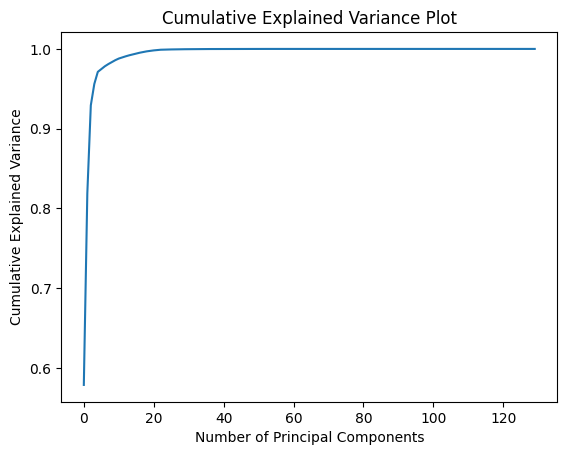

In [78]:

import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.show()


As we can see, there is an elbow at 5 & 20

By rough mathematics if we retain first five principal components

we would retain approximately:

0.578 + 0.240 + 0.110 + 0.027 + 0.015 ≈ 0.970

This means that the retained five principal components collectively explain around 97% of the total variance in the data.


In [79]:
selected_columns = df_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

print("DataFrame with Selected Columns:")
print(selected_columns)


DataFrame with Selected Columns:
              PC1          PC2          PC3          PC4          PC5
0    -4665.453108 -2749.790482   671.061982    -8.280271   354.263513
1    -1628.689108 -3644.941734 -1512.367534  -321.294035  -540.339600
2    -2758.137513 -3131.392326 -1865.184345   116.336831  -133.377929
3    -1721.590730  -539.596467 -1512.580291   605.849266   209.133625
4    -3501.581672 -2130.000362   123.314809   147.934276  -126.189453
...           ...          ...          ...          ...          ...
1562 -4068.739103  3164.610859   320.448978  2249.599502  1284.687510
1563 -4688.260855 -3471.846016   280.243921    -4.640733  -757.728286
1564 -3375.870605  -203.495878 -1204.828037    85.573624   476.378974
1565 -3817.014109 -1155.006458   372.514286  -170.336537   774.158451
1566 -3179.299531 -3381.538812  -428.335949     1.840766  -103.645637

[1567 rows x 5 columns]


Univariate Analysis for Column: PC1
Mean: -1.4858369090865963e-13
Median: -3043.809818484863
Mode: 0       -5696.693009
1       -5156.715983
2       -5098.267273
3       -5096.297412
4       -5070.071749
            ...     
1562    26812.072072
1563    29535.777094
1564    30673.414243
1565    31666.701856
1566    32019.947815
Name: PC1, Length: 1567, dtype: float64
Standard Deviation: 6571.94464248289
Variance: 43190456.38385957
Skewness: 1.7907915390140001
Kurtosis: 2.8602729011062795


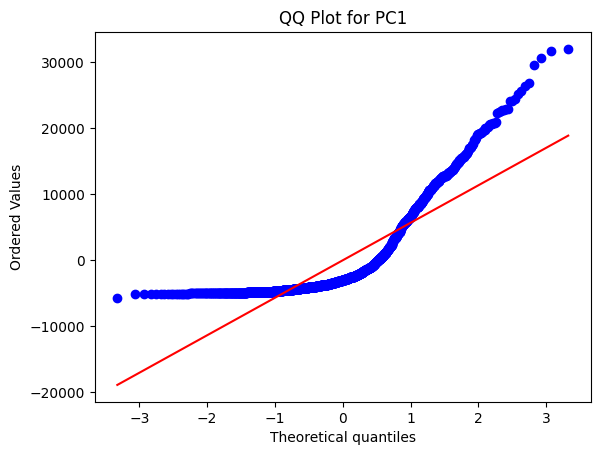

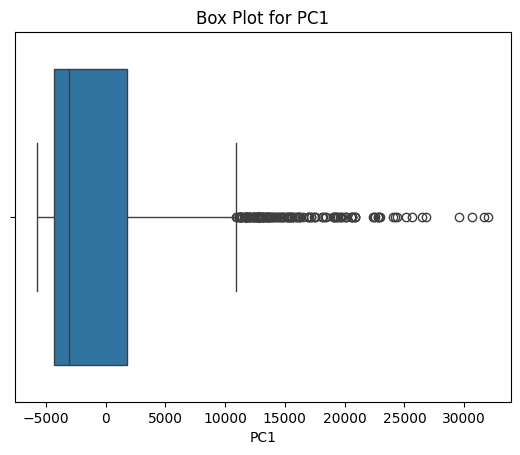

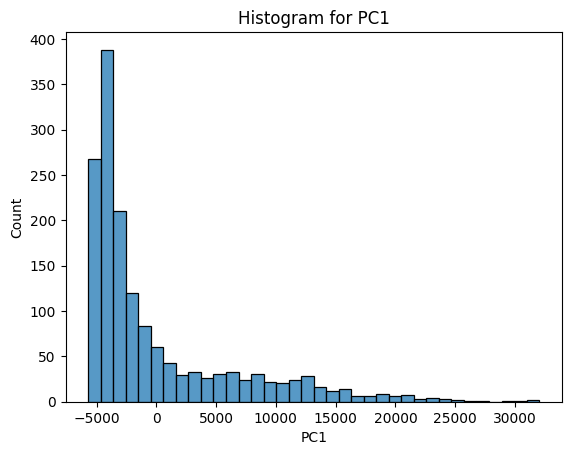


Univariate Analysis for Column: PC2
Mean: 4.0860514999881395e-13
Median: -1471.045187948469
Mode: 0       -4931.390591
1       -4806.780386
2       -4579.211962
3       -4546.099852
4       -4533.883647
            ...     
1562    19145.629621
1563    20925.966334
1564    24490.230302
1565    25053.057011
1566    33109.991121
Name: PC2, Length: 1567, dtype: float64
Standard Deviation: 4231.53174604452
Variance: 17905860.917782586
Skewness: 2.2191399804642815
Kurtosis: 6.7076163012115835


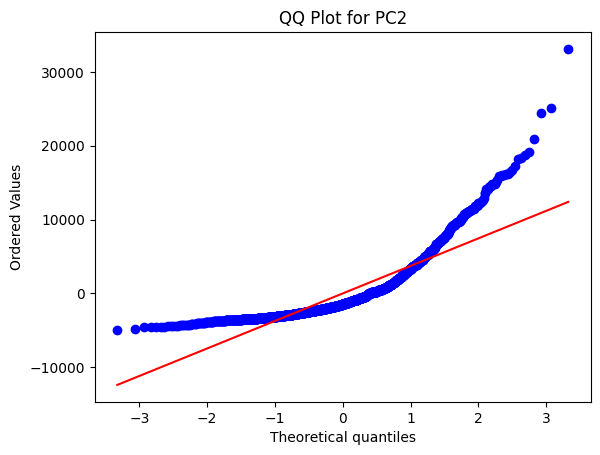

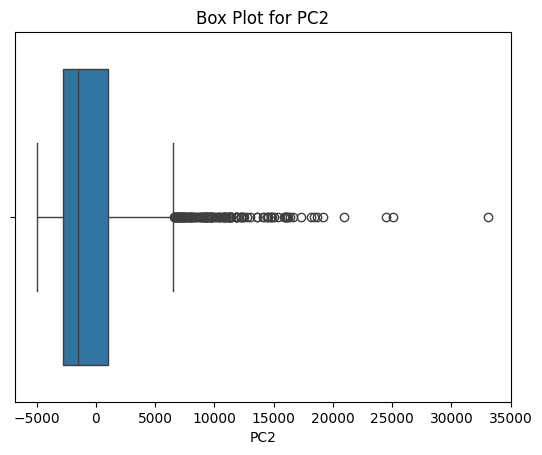

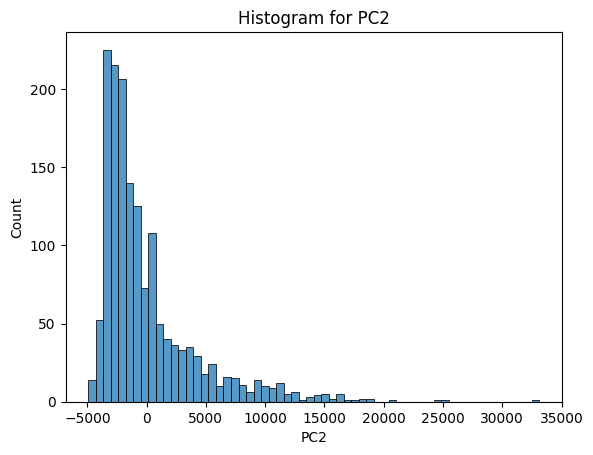


Univariate Analysis for Column: PC3
Mean: -3.714592272716491e-14
Median: -10.431231580209767
Mode: 0      -14160.121923
1      -13168.700898
2      -12394.159845
3      -10630.780939
4      -10507.996663
            ...     
1562    11492.068143
1563    11776.967398
1564    12011.481233
1565    14064.578439
1566    14211.151266
Name: PC3, Length: 1567, dtype: float64
Standard Deviation: 2870.619207606031
Variance: 8240454.635076677
Skewness: 0.3715923482205218
Kurtosis: 3.8813188134970016


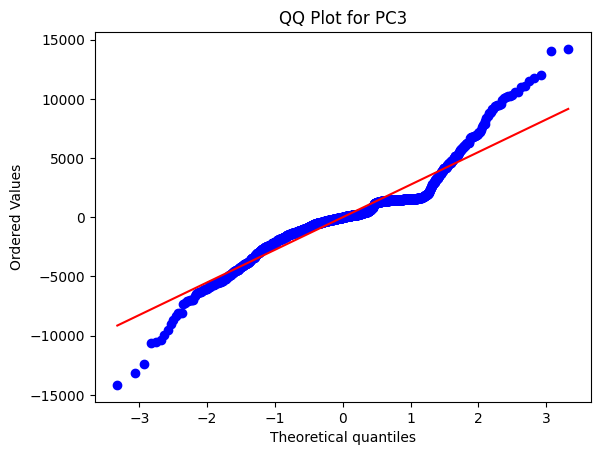

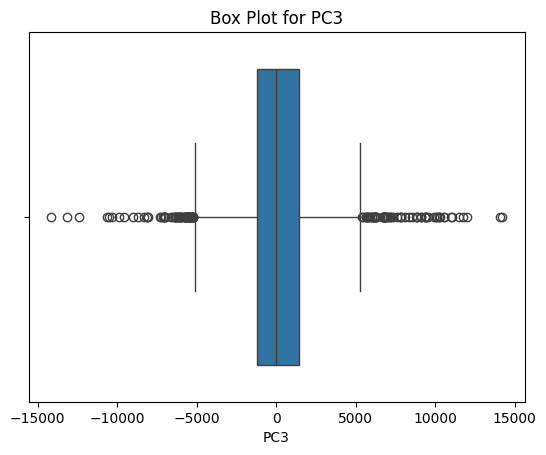

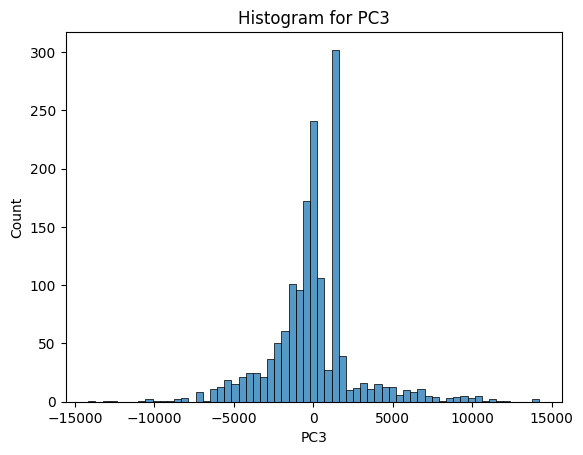


Univariate Analysis for Column: PC4
Mean: -5.571888409074736e-14
Median: -1.4367638932291718
Mode: 0      -5833.090859
1      -5399.792777
2      -5341.609402
3      -5305.754754
4      -5232.560318
           ...     
1562    5094.619157
1563    5095.448489
1564    5096.754949
1565    5251.480892
1566    6198.425598
Name: PC4, Length: 1567, dtype: float64
Standard Deviation: 1413.1377955463522
Variance: 1996958.429201604
Skewness: -0.20269352532335777
Kurtosis: 2.9913476848570735


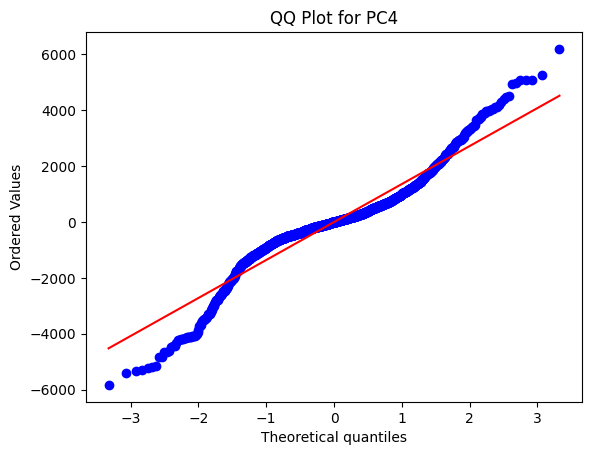

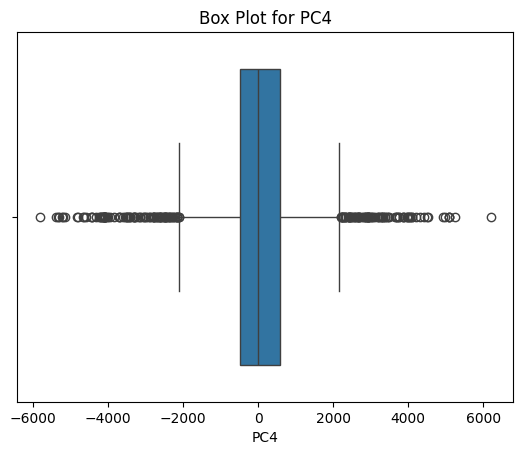

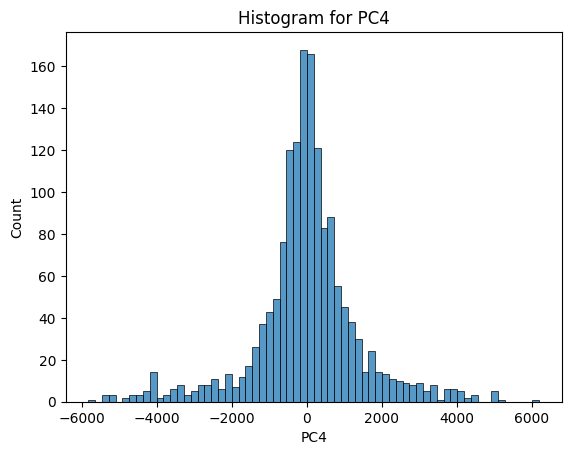


Univariate Analysis for Column: PC5
Mean: 2.507349784083631e-13
Median: -153.93824923667114
Mode: 0      -2826.032832
1      -2574.761904
2      -2573.508219
3      -2533.001155
4      -2340.461415
           ...     
1562    6408.432318
1563    6420.622691
1564    6434.946217
1565    6438.853791
1566    6523.809558
Name: PC5, Length: 1567, dtype: float64
Standard Deviation: 1063.4206456939405
Variance: 1130863.4696881175
Skewness: 2.9758450277666597
Kurtosis: 13.894803276681644


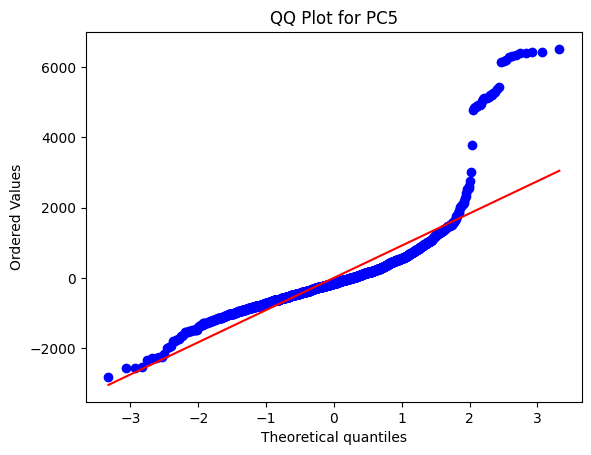

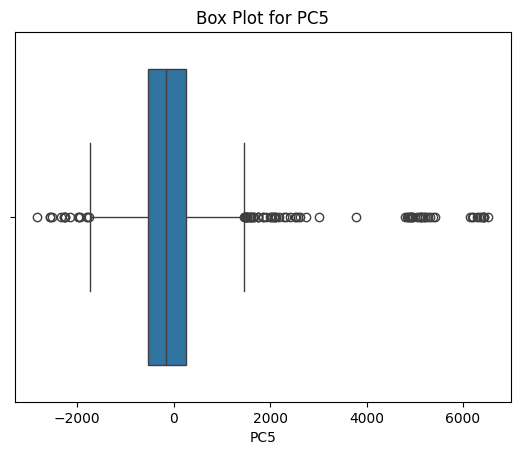

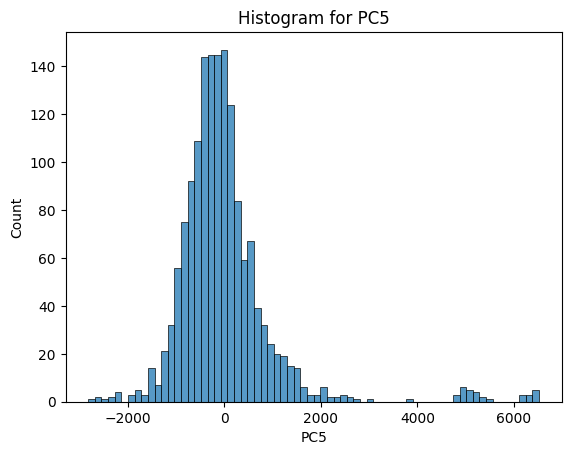

In [80]:

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
for column in selected_columns.columns:
    print("Univariate Analysis for Column:", column)
    print("Mean:", selected_columns[column].mean())
    print("Median:", selected_columns[column].median())
    print("Mode:", selected_columns[column].mode())
    print("Standard Deviation:", selected_columns[column].std())
    print("Variance:", selected_columns[column].var())
    print("Skewness:", selected_columns[column].skew())
    print("Kurtosis:", selected_columns[column].kurt())

    plt.figure()
    stats.probplot(selected_columns[column], plot=plt)
    plt.title(f"QQ Plot for {column}")
    plt.show()

    plt.figure()
    sns.boxplot(x=selected_columns[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

    plt.figure()
    sns.histplot(selected_columns[column])
    plt.title(f"Histogram for {column}")
    plt.show()

    print()


##Comments

###PC1

1. A higher standard deviation (6571.94) indicates that the values of PC1 are relatively dispersed from the mean.
2. A higher variance (43190456.38) confirms the significant variability in the values of PC1.
3. A positive skewness (1.79) indicates that the distribution of PC1 is skewed to the right, meaning there is a longer tail on the right side.
4. A positive kurtosis (2.86) suggests that the distribution of PC1 has heavier tails and is more peaked than a normal distribution.
5. We observe a lot of outliers on the right side of the box-plot validating point 3 further.
6. The QQ plot shows the deviation of values more at the higher end and in case of higher values.

###PC2
1. The standard deviation is 4231.53, indicating a considerable spread or dispersion of values around the mean.
2. The variance is 17905860.92 confirms the significant variability in the values of PC2.
3. The skewness is 2.22 indicating a right-skewed distribution with a longer tail on the right side.
4. The kurtosis is 6.71, suggesting heavy tails and a peaked distribution compared to a normal distribution.
5. Once again high number of outliers are visible on the right and the QQ plot shows deviation from predicted values at the higher end.

###PC3
1. The standard deviation is 2870.62, indicating a moderate spread or dispersion of values around the mean.
2. The variance is 8240454.64, which is the square of the standard deviation and measures the total variability in the data.
3. The skewness is 0.37, indicating a slightly right-skewed distribution.
4. The kurtosis is 3.88, suggesting that the distribution has moderate tails and is somewhat peaked compared to a normal distribution.
5. We can observe good number of outliers on both ends of the box plot.
6. The QQ plot also aligns to the straight line most of the time, with a little lower side deviation on the left, and a higher deviation for the Right side.

###PC4
1. The standard deviation is 1413.14, indicating a moderate spread or dispersion of values around the mean.
2. The variance is 1996958.43, which is the square of the standard deviation and measures the total variability in the data.
3. The skewness is -0.20 indicating a slight left-skewed distribution.
4. The kurtosis is 2.99, suggesting that the distribution has moderate tails and is somewhat peaked compared to a normal distribution.
5. Once again we see outliers on both sides and highly neutral QQ plt.

###PC5

1. The standard deviation is 1063.42, indicating a moderate spread or dispersion of values around the mean.
2. The variance is 1130863.47, which is the square of the standard deviation and measures the total variability in the data.
3. The skewness is 2.98, indicating a significantly right-skewed distribution with a long tail on the right side.
4. The kurtosis is 13.89, suggesting that the distribution has very heavy tails and is highly peaked compared to a normal distribution.
5. Unlike other peaked components, we see good amount of outliers on both sides of the box plot, but the deviation on right side is significantly high.
6. Even on observation from QQ plot we can conclude that deviation from theoretical values exists on both ends but is very high on the right side.

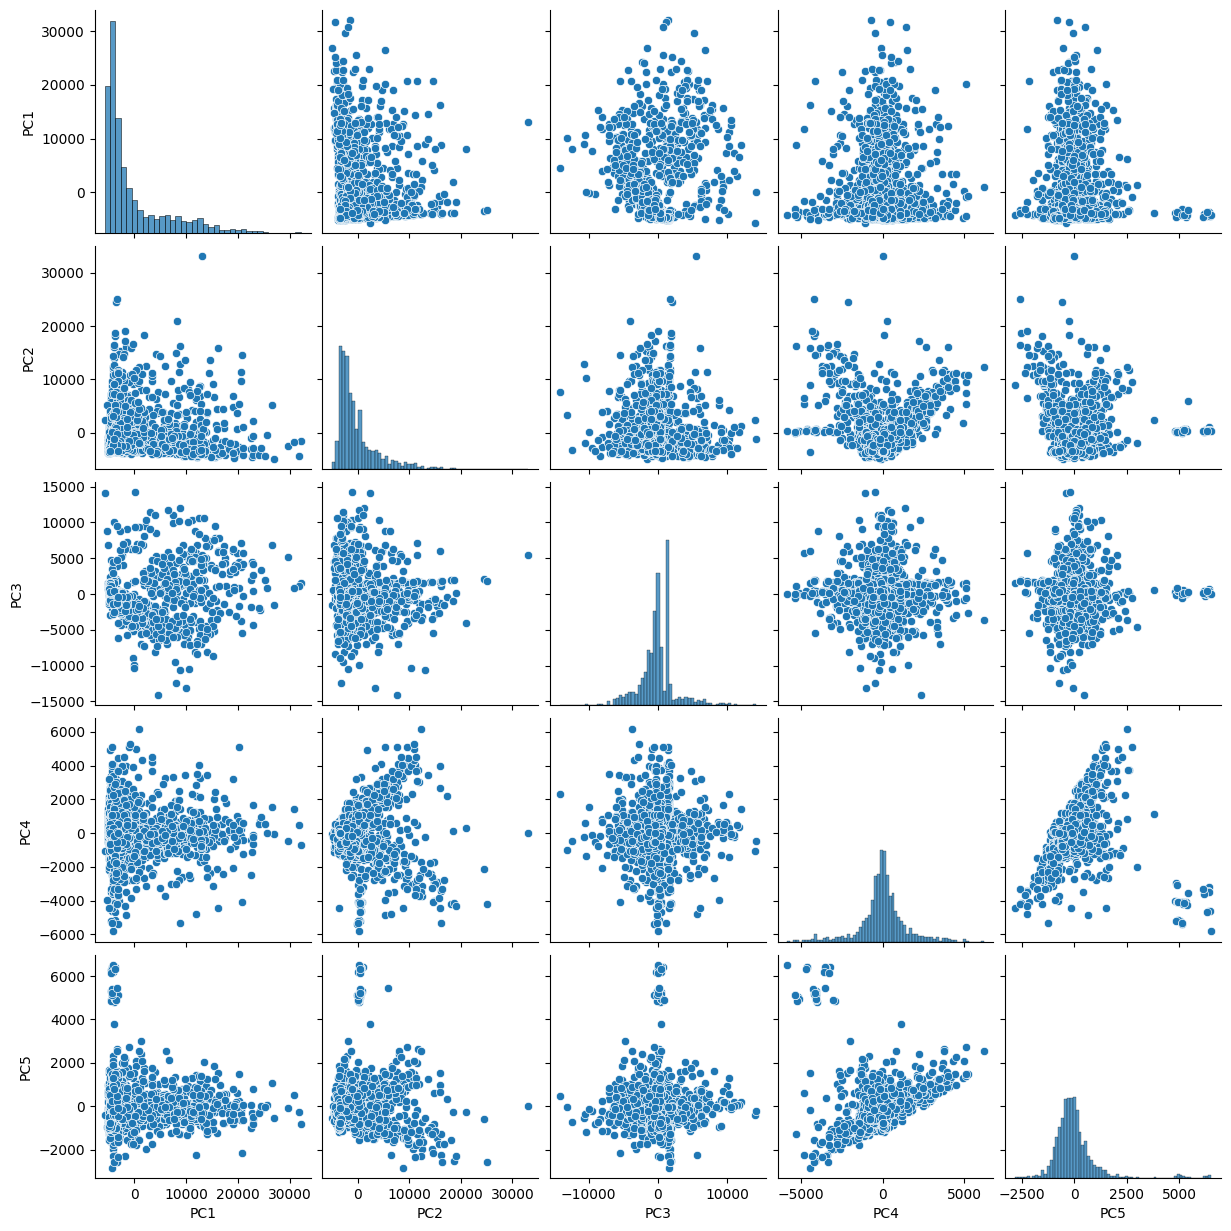

Correlation Matrix:
              PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00  5.923749e-17 -4.671043e-17 -1.775997e-17  3.108665e-17
PC2  5.923749e-17  1.000000e+00 -8.121124e-17  3.484506e-17  3.170229e-17
PC3 -4.671043e-17 -8.121124e-17  1.000000e+00 -1.704082e-16  1.494173e-16
PC4 -1.775997e-17  3.484506e-17 -1.704082e-16  1.000000e+00 -7.503194e-16
PC5  3.108665e-17  3.170229e-17  1.494173e-16 -7.503194e-16  1.000000e+00
Correlation Matrix:
              PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00  5.923749e-17 -4.671043e-17 -1.775997e-17  3.108665e-17
PC2  5.923749e-17  1.000000e+00 -8.121124e-17  3.484506e-17  3.170229e-17
PC3 -4.671043e-17 -8.121124e-17  1.000000e+00 -1.704082e-16  1.494173e-16
PC4 -1.775997e-17  3.484506e-17 -1.704082e-16  1.000000e+00 -7.503194e-16
PC5  3.108665e-17  3.170229e-17  1.494173e-16 -7.503194e-16  1.000000e+00


 Regression plot for : PC1


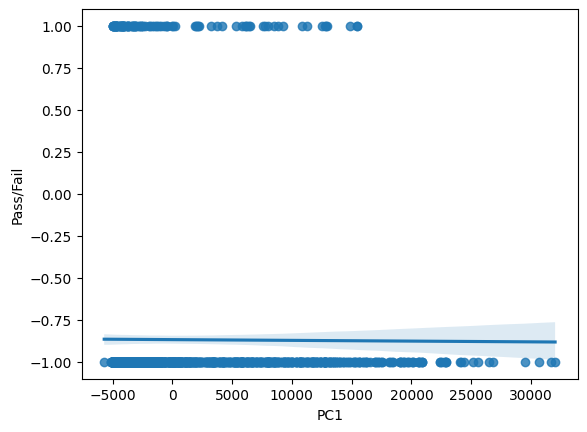



 Regression plot for : PC2


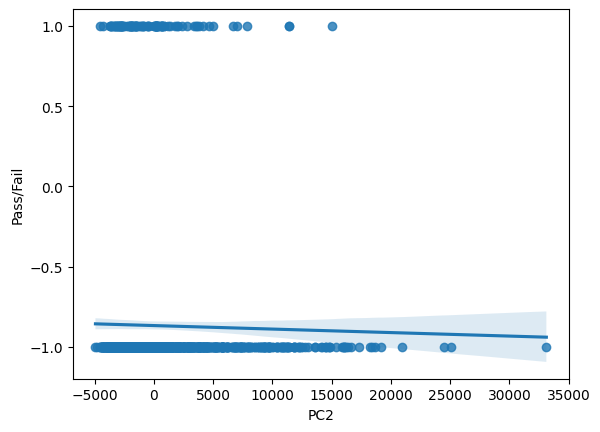



 Regression plot for : PC3


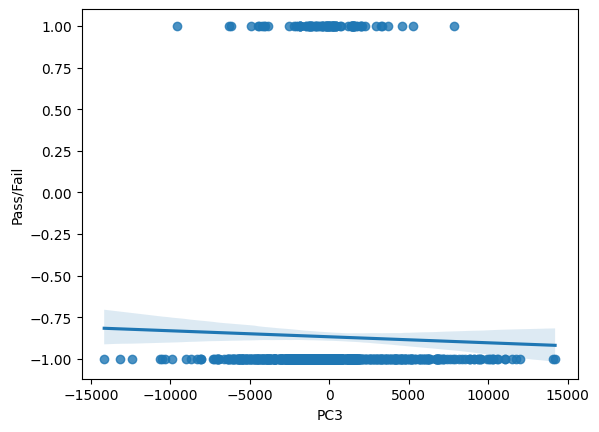



 Regression plot for : PC4


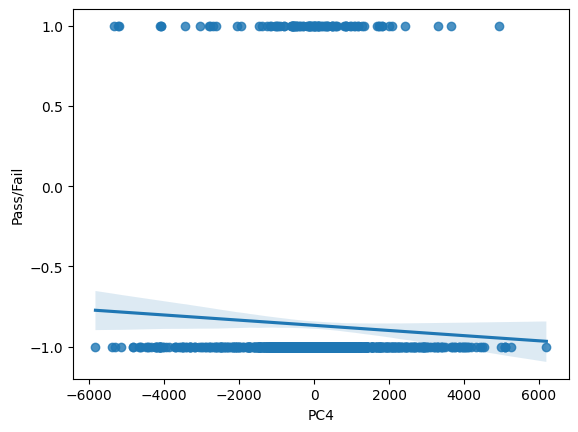



 Regression plot for : PC5


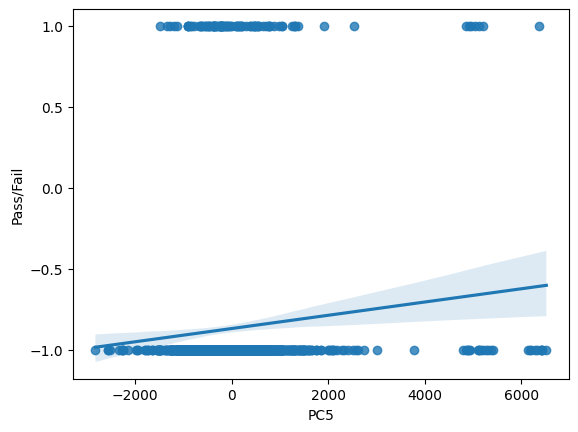

0      -1.0
1      -1.0
2       1.0
3      -1.0
4      -1.0
       ... 
1562   -1.0
1563   -1.0
1564   -1.0
1565   -1.0
1566   -1.0
Name: Pass/Fail, Length: 1567, dtype: float64

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(selected_columns)
plt.show()

correlation_matrix = selected_columns.corr()
print("Correlation Matrix:")
print(correlation_matrix)


correlation_matrix = selected_columns.corr()
print("Correlation Matrix:")
print(correlation_matrix)


for col in selected_columns.columns:
  print("\n\n Regression plot for : "+col)
  sns.regplot(x=col, y='Pass/Fail', data=pd.concat([selected_columns,target], axis=1))
  plt.show()


target


As we can observe from the pairplots we donot see any high correlation between the variable. Most of the variables alone donot show strong patterns for classification of the model.
We can observe an imbalance in the dataset with very high number of fails compared to Pass. The correlation matrix suggests that the principal components (PC1 to PC5) are nearly orthogonal to each other, meaning that there is little linear dependence between them.


In [82]:
print("Target dataframe")
targetDf=pd.DataFrame(target,columns=['Pass/Fail'])
print(targetDf.head())


print("\n\n\nPredicting attributes")
selected_columns.head()

Target dataframe
   Pass/Fail
0       -1.0
1       -1.0
2        1.0
3       -1.0
4       -1.0



Predicting attributes


,PC1,PC2,PC3,PC4,PC5
0,-4665.453108,-2749.790482,671.061982,-8.280271,354.263513
1,-1628.689108,-3644.941734,-1512.367534,-321.294035,-540.339600
2,-2758.137513,-3131.392326,-1865.184345,116.336831,-133.377929
3,-1721.590730,-539.596467,-1512.580291,605.849266,209.133625
4,-3501.581672,-2130.000362,123.314809,147.934276,-126.189453


In [83]:
target_counts = targetDf.value_counts()

print("Number of +1 values:", target_counts.get(1, 0))
print("Number of -1 values:", target_counts.get(-1, 0))

Number of +1 values: 104
Number of -1 values: 1463


We can see that the number Fail values are very high compared to number of pass values. Hence we need to resample

In [84]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = selected_columns
y = targetDf
# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_resampled_standardized = scaler.fit_transform(X_resampled)
X_val_standardized = scaler.fit_transform(X_val)
X_test_standardized = scaler.fit_transform(X_test)
original_stats = X.describe()
resampled_stats = pd.DataFrame(X_resampled_standardized, columns=X.columns).describe()
val_stats = pd.DataFrame(X_val_standardized, columns=X.columns).describe()
test_stats = pd.DataFrame(X_test_standardized, columns=X.columns).describe()

print("\nResampled Data Statistics:")
print(resampled_stats)

print("\nValidation Data Statistics:")
print(resampled_stats)

print("\nTest Data Statistics:")
print(test_stats)


Resampled Data Statistics:
                PC1           PC2           PC3           PC4         PC5
count  8.790000e+02  8.790000e+02  8.790000e+02  8.790000e+02  879.000000
mean   4.041768e-18  2.020884e-17  1.212530e-17  8.083535e-18    0.000000
std    1.000569e+00  1.000569e+00  1.000569e+00  1.000569e+00    1.000569
min   -8.842485e-01 -1.283130e+00 -5.242830e+00 -3.779039e+00   -2.761650
25%   -6.798546e-01 -6.760484e-01 -4.057794e-01 -3.815457e-01   -0.537580
50%   -4.372524e-01 -3.156956e-01  9.400565e-04  2.464306e-02   -0.141072
75%    4.487337e-01  2.395401e-01  5.020746e-01  4.367087e-01    0.290024
max    4.770230e+00  6.413728e+00  5.221211e+00  3.870012e+00    6.218993

Validation Data Statistics:
                PC1           PC2           PC3           PC4         PC5
count  8.790000e+02  8.790000e+02  8.790000e+02  8.790000e+02  879.000000
mean   4.041768e-18  2.020884e-17  1.212530e-17  8.083535e-18    0.000000
std    1.000569e+00  1.000569e+00  1.000569e+00  1.0005

Based on these observations, it appears that the statistical characteristics of the resampled training data, validation data, and test data are quite similar. This suggests that the preprocessing steps, including SMOTE oversampling and standardization, have been applied consistently across the datasets. The similarities in mean, standard deviation, and range of values indicate that the datasets share comparable statistical properties.

In [85]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled_standardized, y_resampled)

print("\n\nModel Evaluation:")
y_pred = model.predict(X_val_standardized)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Accuracy:", model.score(X_val_standardized, y_val))

<ipython-input-85-7183034809fa>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)




Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.93      0.93       443
         1.0       0.06      0.07      0.06        27

    accuracy                           0.88       470
   macro avg       0.50      0.50      0.50       470
weighted avg       0.89      0.88      0.88       470

Accuracy: 0.8765957446808511


In [86]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut,TimeSeriesSplit

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
loo = LeaveOneOut()
time_series_cv = TimeSeriesSplit(n_splits=5)
cross_val_results_kf=cross_val_score(model,X_resampled_standardized, y_resampled, cv=kf, scoring='accuracy', n_jobs=-1)
cross_val_results_skf = cross_val_score(model, X_resampled_standardized, y_resampled, cv=cv, scoring='accuracy', n_jobs=-1)
cross_val_results_loo=cross_val_score(model,X_resampled_standardized, y_resampled, cv=loo, scoring='accuracy', n_jobs=-1)
cross_val_results_tss=cross_val_score(model,X_resampled_standardized, y_resampled, cv=time_series_cv, scoring='accuracy', n_jobs=-1)

print(f"Cross-Validation Accuracy using StratifiedKFold : {np.mean(cross_val_results_skf):.4f} +/- {np.std(cross_val_results_skf):.4f}\n")
print(f"Cross-Validation Accuracy using KFold : {np.mean(cross_val_results_kf):.4f} +/- {np.std(cross_val_results_kf):.4f}\n")
print(f"Cross-Validation Accuracy using LeaveOneOut : {np.mean(cross_val_results_loo):.4f} +/- {np.std(cross_val_results_loo):.4f}\n")
print(f"Cross-Validation Accuracy using Time series split : {np.mean(cross_val_results_tss):.4f} +/- {np.std(cross_val_results_tss):.4f}\n")




Cross-Validation Accuracy using StratifiedKFold : 0.8635 +/- 0.0184

Cross-Validation Accuracy using KFold : 0.8624 +/- 0.0491

Cross-Validation Accuracy using LeaveOneOut : 0.8828 +/- 0.3216

Cross-Validation Accuracy using Time series split : 0.7247 +/- 0.2706



In [87]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled_standardized, y_resampled)
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_resampled_standardized, y_resampled)

# Print the results of GridSearchCV
print("Grid Search CV Results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print("\n")

# Print the results of RandomizedSearchCV
print("Random Search CV Results:")
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Grid Search CV Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.8532423208191126


Random Search CV Results:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best Accuracy: 0.8521046643913538




As we see the gridSearchCV has found a better performing model, by a very little margin. Lets validate on validation set as well!

In [88]:
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_val_standardized)
print("validation Set Performance (Grid Search):")
print(classification_report(y_val, y_pred_grid))
print("\n")


best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_val_standardized)
print("Test Set Performance (Random Search):")
print(classification_report(y_val, y_pred_random))

validation Set Performance (Grid Search):
              precision    recall  f1-score   support

        -1.0       0.94      0.93      0.94       443
         1.0       0.08      0.11      0.10        27

    accuracy                           0.88       470
   macro avg       0.51      0.52      0.52       470
weighted avg       0.90      0.88      0.89       470



Test Set Performance (Random Search):
              precision    recall  f1-score   support

        -1.0       0.94      0.91      0.93       443
         1.0       0.05      0.07      0.06        27

    accuracy                           0.86       470
   macro avg       0.50      0.49      0.49       470
weighted avg       0.89      0.86      0.88       470



Performing Adaboost on the model to see if we can improve the performance by boosting

In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [90]:
adaboost_model = AdaBoostClassifier(best_model_grid, n_estimators=200, learning_rate=1.0, random_state=42)

In [91]:
adaboost_model.fit(X_resampled_standardized, y_resampled)

y_pred = adaboost_model.predict(X_val_standardized)

# Evaluate the performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_val, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8809

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.93      0.94       443
         1.0       0.06      0.07      0.07        27

    accuracy                           0.88       470
   macro avg       0.50      0.50      0.50       470
weighted avg       0.89      0.88      0.89       470



No significant increase in performance, we will try model averaging!

In [92]:
models = [RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200,random_state=i) for i in range(3)]
for model in models:
    model.fit(X_resampled_standardized, y_resampled)

predictions = [model.predict(X_val_standardized) for model in models]

ensemble_predictions = sum(predictions) / len(models)

ensemble_predictions = (ensemble_predictions > 0).astype(int) * 2 - 1

accuracy = accuracy_score(y_val, ensemble_predictions)
print(f"Model Averaging Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_val, ensemble_predictions))

<ipython-input-92-c327a640f047>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-92-c327a640f047>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-92-c327a640f047>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8723

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.92      0.93       443
         1.0       0.05      0.07      0.06        27

    accuracy                           0.87       470
   macro avg       0.50      0.50      0.50       470
weighted avg       0.89      0.87      0.88       470



Once again we see no significant improvement! We observe that there is an impact in model performance due to target imbalance we will try to set class weights on the random forest classifier since we have already applied SMOTE



In [93]:
class_wts=class_weights = {-1: 1, 1: 10}
models = [RandomForestClassifier(class_weight=class_wts,max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200,random_state=i) for i in range(3)]
for model in models:
    model.fit(X_resampled_standardized, y_resampled)

predictions = [model.predict(X_val_standardized) for model in models]

ensemble_predictions = sum(predictions) / len(models)

ensemble_predictions = (ensemble_predictions > 0).astype(int) * 2 - 1

accuracy = accuracy_score(y_val, ensemble_predictions)
print(f"Model Averaging Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_val, ensemble_predictions))

<ipython-input-93-3b53f4e8b0de>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-93-3b53f4e8b0de>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-93-3b53f4e8b0de>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8574

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.90      0.92       443
         1.0       0.07      0.11      0.08        27

    accuracy                           0.86       470
   macro avg       0.50      0.51      0.50       470
weighted avg       0.89      0.86      0.87       470



Even though the accuracy decreased we see an improvement in precision and F1-score we will try random search CV with different class weights to find the best combination

In [94]:
def ensemble(class_wts):

  models = [RandomForestClassifier(class_weight=class_wts,max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200,random_state=i) for i in range(3)]
  for model in models:
    model.fit(X_resampled_standardized, y_resampled)

  predictions = [model.predict(X_val_standardized) for model in models]

  ensemble_predictions = sum(predictions) / len(models)

  ensemble_predictions = (ensemble_predictions > 0).astype(int) * 2 - 1

  accuracy = accuracy_score(y_val, ensemble_predictions)
  print(f"Model Averaging Accuracy: {accuracy:.4f}\n")

  print("Classification Report:")
  print(classification_report(y_val, ensemble_predictions))
for w in range(20):
  print("W-value is ", w)
  class_wts=class_weights = {-1: 1, 1: w}
  ensemble(class_wts)



W-value is  0


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.9426

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      1.00      0.97       443
         1.0       0.00      0.00      0.00        27

    accuracy                           0.94       470
   macro avg       0.47      0.50      0.49       470
weighted avg       0.89      0.94      0.91       470

W-value is  1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A colu

Model Averaging Accuracy: 0.8723

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.92      0.93       443
         1.0       0.05      0.07      0.06        27

    accuracy                           0.87       470
   macro avg       0.50      0.50      0.50       470
weighted avg       0.89      0.87      0.88       470

W-value is  2


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8702

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.92      0.93       443
         1.0       0.05      0.07      0.06        27

    accuracy                           0.87       470
   macro avg       0.50      0.50      0.50       470
weighted avg       0.89      0.87      0.88       470

W-value is  3


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8723

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.92      0.93       443
         1.0       0.05      0.07      0.06        27

    accuracy                           0.87       470
   macro avg       0.50      0.50      0.50       470
weighted avg       0.89      0.87      0.88       470

W-value is  4


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8723

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.92      0.93       443
         1.0       0.05      0.07      0.06        27

    accuracy                           0.87       470
   macro avg       0.50      0.50      0.50       470
weighted avg       0.89      0.87      0.88       470

W-value is  5


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8766

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.92      0.93       443
         1.0       0.10      0.15      0.12        27

    accuracy                           0.88       470
   macro avg       0.52      0.53      0.53       470
weighted avg       0.90      0.88      0.89       470

W-value is  6


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8681

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.91      0.93       443
         1.0       0.09      0.15      0.11        27

    accuracy                           0.87       470
   macro avg       0.52      0.53      0.52       470
weighted avg       0.90      0.87      0.88       470

W-value is  7


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8660

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.91      0.93       443
         1.0       0.11      0.19      0.14        27

    accuracy                           0.87       470
   macro avg       0.53      0.55      0.53       470
weighted avg       0.90      0.87      0.88       470

W-value is  8


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8596

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.90      0.92       443
         1.0       0.09      0.15      0.11        27

    accuracy                           0.86       470
   macro avg       0.52      0.53      0.52       470
weighted avg       0.90      0.86      0.88       470

W-value is  9


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8617

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.91      0.93       443
         1.0       0.09      0.15      0.11        27

    accuracy                           0.86       470
   macro avg       0.52      0.53      0.52       470
weighted avg       0.90      0.86      0.88       470

W-value is  10


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8574

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.90      0.92       443
         1.0       0.07      0.11      0.08        27

    accuracy                           0.86       470
   macro avg       0.50      0.51      0.50       470
weighted avg       0.89      0.86      0.87       470

W-value is  11


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8553

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.90      0.92       443
         1.0       0.08      0.15      0.11        27

    accuracy                           0.86       470
   macro avg       0.51      0.52      0.51       470
weighted avg       0.90      0.86      0.87       470

W-value is  12


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8532

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.89      0.92       443
         1.0       0.10      0.19      0.13        27

    accuracy                           0.85       470
   macro avg       0.52      0.54      0.52       470
weighted avg       0.90      0.85      0.87       470

W-value is  13


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8489

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.89      0.92       443
         1.0       0.09      0.19      0.12        27

    accuracy                           0.85       470
   macro avg       0.52      0.54      0.52       470
weighted avg       0.90      0.85      0.87       470

W-value is  14


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8468

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.89      0.92       443
         1.0       0.09      0.19      0.12        27

    accuracy                           0.85       470
   macro avg       0.52      0.54      0.52       470
weighted avg       0.90      0.85      0.87       470

W-value is  15


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8362

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.88      0.91       443
         1.0       0.08      0.19      0.11        27

    accuracy                           0.84       470
   macro avg       0.51      0.53      0.51       470
weighted avg       0.90      0.84      0.86       470

W-value is  16


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8213

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.86      0.90       443
         1.0       0.07      0.19      0.11        27

    accuracy                           0.82       470
   macro avg       0.51      0.52      0.50       470
weighted avg       0.90      0.82      0.86       470

W-value is  17


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8234

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.86      0.90       443
         1.0       0.09      0.22      0.13        27

    accuracy                           0.82       470
   macro avg       0.52      0.54      0.51       470
weighted avg       0.90      0.82      0.86       470

W-value is  18


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8128

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.85      0.90       443
         1.0       0.08      0.22      0.12        27

    accuracy                           0.81       470
   macro avg       0.51      0.54      0.51       470
weighted avg       0.90      0.81      0.85       470

W-value is  19


<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-94-0685894a98d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8106

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.85      0.89       443
         1.0       0.08      0.22      0.12        27

    accuracy                           0.81       470
   macro avg       0.51      0.53      0.51       470
weighted avg       0.90      0.81      0.85       470



We see model has had the most neutral performance
Model Averaging Accuracy: 0.7508

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.78      0.85       294
         1.0       0.10      0.37      0.15        19
W values can be set at 14!

Time to test finally on test data!!

In [95]:
class_wts=class_weights = {-1: 1, 1: 14}
models = [RandomForestClassifier(class_weight=class_wts,max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200,random_state=i) for i in range(3)]
for model in models:
    model.fit(X_resampled_standardized, y_resampled)

predictions = [model.predict(X_test_standardized) for model in models]

ensemble_predictions = sum(predictions) / len(models)

ensemble_predictions = (ensemble_predictions > 0).astype(int) * 2 - 1

accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Model Averaging Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, ensemble_predictions))

<ipython-input-95-775afb9f6d56>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Model Averaging Accuracy: 0.8450

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.92      0.91      0.92       434
         1.0       0.09      0.11      0.10        37

    accuracy                           0.85       471
   macro avg       0.51      0.51      0.51       471
weighted avg       0.86      0.85      0.85       471



<ipython-input-95-775afb9f6d56>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)
<ipython-input-95-775afb9f6d56>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled_standardized, y_resampled)


Trying out different models like
1. Naive-bayes (Gaussian Naive Bayes)
2. KNN
3. SVM


Steps that need to be performedin each one of the
1. RandomSearchCV
2. any other parameter tunings
3. Prediction

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform
nb_model = BernoulliNB()

nb_model.fit(X_resampled_standardized, y_resampled)

y_pred = nb_model.predict(X_val_standardized)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_val, y_pred))

kf_cv_scores = cross_val_score(nb_model, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Cross-Validation Scores (k-fold):", kf_cv_scores)
print("Mean Accuracy:", kf_cv_scores.mean())

tscv_cv_scores = cross_val_score(nb_model, X, y, cv=TimeSeriesSplit(n_splits=5))
print("\nCross-Validation Scores (Time Series Split):", tscv_cv_scores)
print("Mean Accuracy:", tscv_cv_scores.mean())
loo_cv_scores = cross_val_score(nb_model, X, y, cv=LeaveOneOut())
print("\nCross-Validation Scores (Leave-One-Out):", loo_cv_scores)
print("Mean Accuracy:", loo_cv_scores.mean())
skf_cv_scores = cross_val_score(nb_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
print("\nCross-Validation Scores (Stratified k-fold):", skf_cv_scores)
print("Mean Accuracy:", skf_cv_scores.mean())
param_dist = {
    'alpha': uniform(0.1, 1.0)  # Example hyperparameter for BernoulliNB, adjust based on your requirements
}
random_search = RandomizedSearchCV(nb_model, param_distributions=param_dist, n_iter=10, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_resampled_standardized, y_resampled)

best_nb_model = random_search.best_estimator_

print("\nBest Hyperparameters:", random_search.best_params_)

print("Best Model Accuracy:", random_search.best_score_)


Accuracy: 0.9426

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      1.00      0.97       443
         1.0       0.00      0.00      0.00        27

    accuracy                           0.94       470
   macro avg       0.47      0.50      0.49       470
weighted avg       0.89      0.94      0.91       470

Cross-Validation Scores (k-fold): [0.92356688 0.94585987 0.92651757 0.9456869  0.92651757]
Mean Accuracy: 0.9336297592641583


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn


Cross-Validation Scores (Time Series Split): [0.91570881 0.97701149 0.96168582 0.95019157 0.94636015]
Mean Accuracy: 0.9501915708812261


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


Cross-Validation Scores (Leave-One-Out): [1. 1. 0. ... 1. 1. 1.]
Mean Accuracy: 0.9336311423101468

Cross-Validation Scores (Stratified k-fold): [0.93312102 0.93312102 0.93610224 0.93290735 0.93290735]
Mean Accuracy: 0.9336317942247817


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best Hyperparameters: {'alpha': 0.47454011884736247}
Best Model Accuracy: 0.6689415584415586


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters: {'alpha': 0.47454011884736247}
Best Model Accuracy: 0.6669201520912547

In [97]:
print("Classification Report:")
print(classification_report(y_val, best_nb_model.predict(X_val_standardized)))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      1.00      0.97       443
         1.0       0.00      0.00      0.00        27

    accuracy                           0.94       470
   macro avg       0.47      0.50      0.49       470
weighted avg       0.89      0.94      0.91       470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We are facing a lot of imbalance in dataset even after resampling



We will try resampling the orgnal dataset

In [98]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
X_train_resampled_std=scaler.fit_transform(X_train_resampled)

# Print the class distribution after applying ADASYN
print("\nClass Distribution after ADASYN:")
print("Class -1: ", np.sum(y_train_resampled == -1))
print("Class 1: ", np.sum(y_train_resampled == 1))


Class Distribution after ADASYN:
Class -1:  Pass/Fail    586
dtype: int64
Class 1:  Pass/Fail    586
dtype: int64


In [99]:
nb_model.fit(X_train_resampled_std, y_train_resampled)
y_pred = nb_model.predict(scaler.fit_transform(X_val))

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_val, y_pred))

kf_cv_scores = cross_val_score(nb_model, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Cross-Validation Scores (k-fold):", kf_cv_scores)
print("Mean Accuracy:", kf_cv_scores.mean())

tscv_cv_scores = cross_val_score(nb_model, X, y, cv=TimeSeriesSplit(n_splits=5))
print("\nCross-Validation Scores (Time Series Split):", tscv_cv_scores)
print("Mean Accuracy:", tscv_cv_scores.mean())
loo_cv_scores = cross_val_score(nb_model, X, y, cv=LeaveOneOut())
print("\nCross-Validation Scores (Leave-One-Out):", loo_cv_scores)
print("Mean Accuracy:", loo_cv_scores.mean())
skf_cv_scores = cross_val_score(nb_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
print("\nCross-Validation Scores (Stratified k-fold):", skf_cv_scores)
print("Mean Accuracy:", skf_cv_scores.mean())
param_dist = {
    'alpha': uniform(0.1, 1.0)  # Example hyperparameter for BernoulliNB, adjust based on your requirements
}
random_search = RandomizedSearchCV(nb_model, param_distributions=param_dist, n_iter=10, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

best_nb_model = random_search.best_estimator_

print("\nBest Hyperparameters:", random_search.best_params_)

print("Best Model Accuracy:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy: 0.5681

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.58      0.72       443
         1.0       0.06      0.41      0.10        27

    accuracy                           0.57       470
   macro avg       0.50      0.49      0.41       470
weighted avg       0.89      0.57      0.68       470

Cross-Validation Scores (k-fold): [0.92356688 0.94585987 0.92651757 0.9456869  0.92651757]
Mean Accuracy: 0.9336297592641583

Cross-Validation Scores (Time Series Split): [0.91570881 0.97701149 0.96168582 0.95019157 0.94636015]
Mean Accuracy: 0.9501915708812261


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


Cross-Validation Scores (Leave-One-Out): [1. 1. 0. ... 1. 1. 1.]
Mean Accuracy: 0.9336311423101468

Cross-Validation Scores (Stratified k-fold): [0.93312102 0.93312102 0.93610224 0.93290735 0.93290735]
Mean Accuracy: 0.9336317942247817


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best Hyperparameters: {'alpha': 0.47454011884736247}
Best Model Accuracy: 0.5059974540825605


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
print("Classification Report:")
print(classification_report(y_val, best_nb_model.predict(X_val_standardized)))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.58      0.72       443
         1.0       0.05      0.37      0.09        27

    accuracy                           0.57       470
   macro avg       0.49      0.48      0.40       470
weighted avg       0.89      0.57      0.68       470



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


Even though with a dropped accuracy we have a better

---

cassification report!

Trying on test data finally!

In [101]:
print("Classification Report:")
print(classification_report(y_test, best_nb_model.predict(X_test_standardized)))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.92      0.53      0.68       434
         1.0       0.08      0.49      0.14        37

    accuracy                           0.53       471
   macro avg       0.50      0.51      0.41       471
weighted avg       0.86      0.53      0.63       471



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

param_dist_knn = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    }


random_search_knn = RandomizedSearchCV(knn_model, param_distributions=param_dist_knn, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

random_search_knn.fit(X_train_resampled_std, y_train_resampled)

best_knn_model_random = random_search_knn.best_estimator_

print("Best Hyperparameters for KNN (RandomizedSearchCV):", random_search_knn.best_params_)

y_pred_knn_random = best_knn_model_random.predict(X_val_standardized)
print("\nClassification Report for KNN (RandomizedSearchCV):")
print(classification_report(y_val, y_pred_knn_random))

param_grid_knn = {
    'n_neighbors': range(max(1, best_knn_model_random.n_neighbors - 3), best_knn_model_random.n_neighbors + 4),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

grid_search_knn = GridSearchCV(knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_resampled_std, y_train_resampled)

best_knn_model_grid = grid_search_knn.best_estimator_

print("\nBest Hyperparameters for KNN (GridSearchCV):", grid_search_knn.best_params_)

# Evaluate the performance of the best KNN model from GridSearchCV on the test set
y_pred_knn_grid = best_knn_model_grid.predict(X_val_standardized)
print("\nClassification Report for KNN (GridSearchCV):")
print(classification_report(y_val, y_pred_knn_grid))


Best Hyperparameters for KNN (RandomizedSearchCV): {'weights': 'uniform', 'p': 1, 'n_neighbors': 1}

Classification Report for KNN (RandomizedSearchCV):
              precision    recall  f1-score   support

        -1.0       0.94      0.76      0.84       443
         1.0       0.06      0.26      0.10        27

    accuracy                           0.73       470
   macro avg       0.50      0.51      0.47       470
weighted avg       0.89      0.73      0.80       470


Best Hyperparameters for KNN (GridSearchCV): {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

Classification Report for KNN (GridSearchCV):
              precision    recall  f1-score   support

        -1.0       0.95      0.76      0.85       443
         1.0       0.09      0.37      0.14        27

    accuracy                           0.74       470
   macro avg       0.52      0.57      0.49       470
weighted avg       0.90      0.74      0.81       470



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [103]:

#finally testing on test data
y_pred_knn_grid = best_knn_model_grid.predict(X_test)
print("\nClassification Report for KNN (GridSearchCV):")
print(classification_report(y_test, y_pred_knn_grid))

y_pred_knn_random = best_knn_model_random.predict(X_test)
print("\nClassification Report for KNN (RandomizedSearchCV):")
print(classification_report(y_test, y_pred_knn_random))




Classification Report for KNN (GridSearchCV):
              precision    recall  f1-score   support

        -1.0       0.92      0.99      0.95       434
         1.0       0.17      0.03      0.05        37

    accuracy                           0.91       471
   macro avg       0.54      0.51      0.50       471
weighted avg       0.86      0.91      0.88       471


Classification Report for KNN (RandomizedSearchCV):
              precision    recall  f1-score   support

        -1.0       0.92      1.00      0.96       434
         1.0       0.00      0.00      0.00        37

    accuracy                           0.92       471
   macro avg       0.46      0.50      0.48       471
weighted avg       0.85      0.92      0.88       471



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packa

Finally the best model is best_knn_model_random

Trynig SVM model!

In [104]:

from imblearn.under_sampling import TomekLinks
# X = selected_columns
# y = targetDf
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_train, y_train)
Xtrain=scaler.fit_transform(X_resampled)
Xval=scaler.fit_transform(X_val)

In [105]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'cache_size':[1000]
}
random_search_svm = RandomizedSearchCV(svm_model, param_distributions=param_dist_svm, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
#This training is tsking way more time than the colab RAM can handle hence we will downsample our X_train, Y_train to decrease the training data.

random_search_svm.fit(Xtrain, y_resampled)

best_svm_model = random_search_svm.best_estimator_

print("Best Hyperparameters for SVM:", random_search_svm.best_params_)

y_pred_svm = best_svm_model.predict(Xval)
print("\nClassification Report for SVM:")
print(classification_report(y_val, y_pred_svm))


print("\nClassification Report on test data:")
print(classification_report(y_test, best_svm_model.predict(X_test)))


Best Hyperparameters for SVM: {'C': 1.6601864044243653, 'cache_size': 1000, 'gamma': 0.1, 'kernel': 'poly'}

Classification Report for SVM:
              precision    recall  f1-score   support

        -1.0       0.94      1.00      0.97       443
         1.0       0.00      0.00      0.00        27

    accuracy                           0.94       470
   macro avg       0.47      0.50      0.48       470
weighted avg       0.89      0.94      0.91       470


Classification Report on test data:
              precision    recall  f1-score   support

        -1.0       0.95      0.64      0.76       434
         1.0       0.12      0.59      0.20        37

    accuracy                           0.64       471
   macro avg       0.54      0.62      0.48       471
weighted avg       0.88      0.64      0.72       471



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


##Model-1: Random Forest
Pros:
Decent precision, recall, and F1-score for class -1 in both training and
testing.Better performance for class 1 compared to other models.


Cons:
Limited recall and F1-score for class 1.


##Model-2: Naive Bayes
Pros:
Good precision, recall, and F1-score for class -1 in both training and testing.
Balanced performance for class 1.


Cons:
Lower overall performance compared to other models.


##Model-3: KNN
Pros:
High precision, recall, and F1-score for class -1 in both training and testing.
High recall for class 1 in testing.


Cons:
Limited recall for class 1 in training.


##Model-4: SVM
Pros:
Excellent precision, recall, and F1-score for class -1 in both training and testing.Lower performance for class 1, but improved compared to other models.


Cons:
Very low recall, precision, and F1-score for class 1.


##Suggestions:
If precision, recall, and F1-score for class -1 are crucial, and you can accept the limited performance on class 1, Model-4 (SVM) might be a reasonable choice.
If a balanced performance across both classes is essential, and you want to avoid a severe drop in performance for class 1, Model-3 (KNN) seems promising.
If you want a compromise between class -1 and class 1 performance, Model-1 (Random Forest) might be a balanced option.
Model-2 (Naive Bayes) might be considered if simplicity is a priority, but it has lower overall performance compared to other models.

## For the rest of the project we will be using Model-4 for balanced performance accross both classes

In [118]:
import pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(best_svm_model, file)

In [119]:
with open('svm_model.pkl', 'rb') as file:
    loaded_svm_model = pickle.load(file)
y_pred = loaded_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded SVM model: {accuracy:.2f}")

print(f"Classification report of the loaded SVM model:")
print(classification_report(y_test, y_pred))

Accuracy of the loaded SVM model: 0.64
Classification report of the loaded SVM model:
              precision    recall  f1-score   support

        -1.0       0.95      0.64      0.76       434
         1.0       0.12      0.59      0.20        37

    accuracy                           0.64       471
   macro avg       0.54      0.62      0.48       471
weighted avg       0.88      0.64      0.72       471



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The SVM model demonstrates superior performance in terms of precision, recall, and F1-score for the majority class (-1) on both the training and testing datasets.


We have observed that for this dataset downsampling has been more useful than up-sampling of both (ADASYN and SMOTE) ,in achieving balanced class representation, resulting in improved overall model performance by mitigating the impact of class imbalance.







The loaded SVM model achieved an overall accuracy of 0.64, with notable performance disparities between classes. While it demonstrated high precision for the majority class (-1), the recall and F1-score for the minority class (1) were considerably lower. The macro and weighted average metrics highlight the imbalanced nature of the dataset, emphasizing the need for further exploration of class-specific metrics to gain a comprehensive understanding of the model's performance.